<b>Arnie Larson<br>
EEP 592 - Radar, Autumn 2022<br>
Final Project<br></b>

- Test capture with pyaudio
- Set framerate?


In [2]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy import signal
from scipy.io import wavfile
import wave


In [131]:
CHUNK=1024
FORMAT=pyaudio.paInt16
CHANNELS=2
RATE=8000
RECORD_SECONDS=10

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
               channels=CHANNELS,
               rate=RATE,
               input=True,
               frames_per_buffer=CHUNK)

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)
    
print("* done recording")
stream.stop_stream()
stream.close()
p.terminate()


* recording
* done recording


In [34]:
test2=frames

In [132]:

w = wave.open("test11.wav", 'wb')
w.setnchannels(CHANNELS)
w.setsampwidth(p.get_sample_size(FORMAT))
w.setframerate(RATE)
w.writeframes(b''.join(frames))
w.close().

In [3]:
import os
os.getcwd()

'/Users/arnie/Documents/EE/Code/UWEE-592-Radar/notebooks'

In [3]:
## Look at the data
r, d = wavfile.read("../project/data/nt1.wav")

In [5]:
print(r, d.shape)

48000 (288000,)


In [22]:
# at 48000 sample rate - max freq is 24000.  
# if 2048 samples are incldued, that's a delta f of 
24000/2048

11.71875

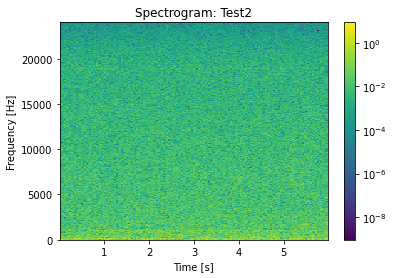

In [8]:
## Plot spectrogram (First 12 seconds, no noise)
f, t, S = signal.spectrogram(d, r, nperseg=1024*2) #, nfft=256*2)
plt.pcolormesh(t, f, S, shading="auto", norm=colors.LogNorm(vmin=S.min(), vmax=S.max()))
plt.colorbar()
plt.xlabel("Time [s]"), plt.ylabel("Frequency [Hz]")
plt.title("Spectrogram: Test2")
plt.show()

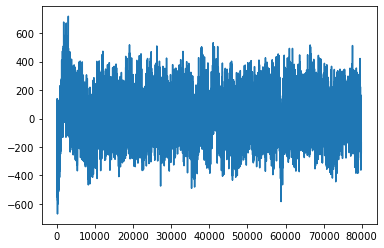

In [55]:
plt.plot(data3[:,0])

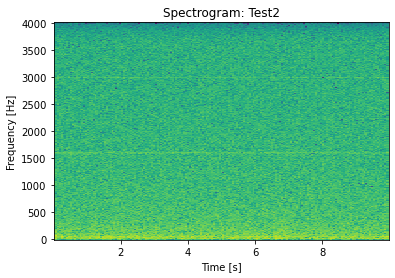

In [82]:
## Plot spectrogram (First 12 seconds, no noise)
ftest, ttest, Sxx = signal.spectrogram(data5[:,1], rate4, nperseg=512) #, nfft=256*2)
plt.pcolormesh(ttest, ftest, Sxx, shading="auto", norm=colors.LogNorm(vmin=Sxx.min(), vmax=Sxx.max()))
plt.xlabel("Time [s]"), plt.ylabel("Frequency [Hz]")
plt.title("Spectrogram: Test2")
plt.show()